<h1>Projeto 1 - SCC0270 Redes neurais e aprendizado profundo</h1>

Estudante: Mateus F. Piris --
Professor: Tiago S. de Nazaré
     

<h4> Contextualização do problema </h4

Nos foi fornecida duas bases de dados (uma de treino e outra de teste) com o intuito de criamos modelos de predição de fraudes bancárias, com redes neurais e knn (para efeito de comparação). Cada registro de transação possui 28 colunas e uma variável booleana que indica se houve fraude ou não.

<h2> Questão 1 </h2>

<h4>Baseado na base de dados fornecida, qual das duas métricas de avaliação deve ser usada para medir os resultados dos modelos: acurácia ou AUC?</h4>

Como essa base de dados é muito desbalanceada, existe muito mais casos de transações não fraudulentas do que fraudulentas, assim, a métrica de acurária não mediria bem nosso modelo; por exemplo, se essa base de dados tivesse 90% de casos não fraudulentos e os 10% restantes fossem fraudes e a acurácia indicando 90% de casos certos não representa nada. Assim, a métrica AUC (area under the curve) é mais apropriada para esse cenário de base desbalanceada.

<h4>Na base fornecida, qual seria o resultado esperado de um modelo aleatório para cada uma das duas métricas (Acurácia e AUC)?</h4>

Como temos apenas duas classes de saída (fraude e não fraude), um modelo aleatório teria uma acurácia que tende a 50% e AUC também 50%. A prova está no apêndice no fim da página.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

 <h2> Questão 2 </h2>
 <h3>Criação dos modelos de redes neurais</h3>
    
  cada um dos 5 modelos abaixo possui diferentes taxas de aprendizado 

In [16]:
model1a = MLPClassifier(
    hidden_layer_sizes = (20,20,20,20,20),
    random_state = 42,
    alpha=0.0
)

model1b = MLPClassifier(
    hidden_layer_sizes = (20,20,20,20,20),
    random_state = 42,
    alpha=0.01
)

model1c = MLPClassifier(
    hidden_layer_sizes = (20,20,20,20,20),
    random_state = 42,
    alpha=0.1
)

model1d = MLPClassifier(
    hidden_layer_sizes = (20,20,20,20,20),
    random_state = 42,
    alpha=1
)

model1e = MLPClassifier(
    hidden_layer_sizes = (20,20,20,20,20),
    random_state = 42,
    alpha=10
)


Leitura dos arquivos de treino e teste

In [17]:
x_train = pd.read_csv("/home/mateus/Documents/Universidade/2021.1/Redes_Neurais/X_train.csv")
y_train = pd.read_csv("/home/mateus/Documents/Universidade/2021.1/Redes_Neurais/Y_train.csv")

In [18]:
x_test = pd.read_csv("/home/mateus/Documents/Universidade/2021.1/Redes_Neurais/X_test.csv")
y_test = pd.read_csv("/home/mateus/Documents/Universidade/2021.1/Redes_Neurais/Y_test.csv")

In [19]:
y_train = to_categorical(y_train,2)
y_test = to_categorical(y_test,2)

In [79]:
x_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142399,0.984968,0.128543,0.184937,1.111150,-0.219888,-0.848688,0.516601,-0.198159,-0.553829,0.096242,...,0.081514,0.103577,-0.253419,-1.015941,0.056629,0.487439,0.322926,-0.784093,-0.017026,0.035475
142400,-2.220505,1.004012,1.817520,0.468496,-1.543388,0.783308,-1.443050,1.759537,0.113066,-1.297413,...,0.367352,-0.407173,0.326262,0.815443,-0.316988,0.325663,0.346348,0.596696,-0.532298,-0.181901
142401,-2.280315,2.241435,-0.082290,-0.417547,-0.700328,-0.393024,-0.347291,1.247646,-0.136156,0.643005,...,0.433290,0.348312,-0.276048,-0.745789,0.016664,-0.401850,0.096932,0.093746,0.150113,-0.074114
142402,-0.879062,0.476433,2.418721,-1.032235,-0.008689,-1.090413,0.919090,-0.466605,0.554397,-0.356330,...,-1.979680,-0.267422,-0.067034,-0.057123,0.021552,0.671743,-0.419799,-0.230648,-0.534309,-0.311789


In [80]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

<h3> Treino e avaliação dos modelos </h3>

Os 5 diferentes modelos são treinados a partir da base de treino e avaliados com a base de teste. Para a avaliação usamos a métrica auc (area under the curve) que é mais adequada para dados desbalanceados, já que os dados de treino e teste possuem pouquíssimos exemplares de fraude.

In [20]:
model1a.fit(x_train,y_train)
y_predicted_1a = model1a.predict_proba(x_test)
roc_1a = roc_auc_score(y_test,y_predicted_1a)

In [21]:
model1b.fit(x_train,y_train)
y_predicted_1b = model1b.predict_proba(x_test)
roc_1b = roc_auc_score(y_test,y_predicted_1b)

In [22]:
model1c.fit(x_train,y_train)
y_predicted_1c = model1c.predict_proba(x_test)
roc_1c = roc_auc_score(y_test,y_predicted_1c)

In [23]:
model1d.fit(x_train,y_train)
y_predicted_1d = model1d.predict_proba(x_test)
roc_1d = roc_auc_score(y_test,y_predicted_1d)

In [24]:
model1e.fit(x_train,y_train)
y_predicted_1e = model1e.predict_proba(x_test)
roc_1e = roc_auc_score(y_test,y_predicted_1e)

<h4> Resultados obtidos </h4>

In [25]:
print("Modelo com alpha = 0: " + str(roc_1a))
print("Modelo com alpha = 0.01: " + str(roc_1b))
print("Modelo com alpha = 0.1: " + str(roc_1c))
print("Modelo com alpha = 1: " + str(roc_1d))
print("Modelo com alpha = 10: " + str(roc_1e))

Modelo com alpha = 0: 0.9224222343054058
Modelo com alpha = 0.01: 0.9377649013724155
Modelo com alpha = 0.1: 0.9778335678830661
Modelo com alpha = 1: 0.9808243135241312
Modelo com alpha = 10: 0.11819791844734176


<h4> Comentário sobre Regularização </h4>

A técnica de regularização em modelos de redes neurais serve para reduzir o overfitting do modelo, o resultado dele sobre a rede é que a rede após ser treinada usa menos de seu poder de aprendizado do que todo seu potencial, de modo a tentar extrair apenas as características inerentes ao modelo e descartar ruídos. Se o modelo de rede neural aprendesse com os ruídos ele teria overfitting e usaria mais de sua capacidade computacional para modelar esse ruído. A regularização opera trabalhando na fase de treino da rede inputando um novo fator ao erro, sem regularização o erro é a loss da saída (que é a diferença -total ou logarítmica- entre a saída e a label da entrada de treino), E = L, que é o fator que o modelo visa minimizar; já com a regularização o erro passa a ser composto pela loss e por um termo referente à regularização,  E = L + &lambda;R. Para regularização L2, o valor de R é a soma dos quadrados dos pesos e &lambda; (taxa de regularização) diz respeito ao peso da regularização no processo de aprendizagem. Em termos gerais o modelo ainda tenta minimizar o erro (E), agora minimizando a loss e a quantidade de pesos (w) usados.

 <h2> Questão 3 </h2>
 <h3> Comparação de diversas arquiteturas do MLPCLassifier (rede neural) e do modelo KNN Classifier </h3>

Teremos 6 modelos para comparar, que são:
* Rede Neural sem camadas intermediárias;
* Rede Neural com uma camada intermediária de 10 neurônios;
* Rede Neural com duas camadas, com 5 neurônios cada;
* KNN com k=3;
* KNN com k=5;
* KNN com k=7.


In [26]:
model2 = MLPClassifier(
)

model3 = MLPClassifier(
    hidden_layer_sizes = (10)
)

model4 = MLPClassifier(
    hidden_layer_sizes = (5,5)
)

neigh3 = KNeighborsClassifier(n_neighbors=3)

neigh5 = KNeighborsClassifier(n_neighbors=5)

neigh7 = KNeighborsClassifier(n_neighbors=7)

<h3> Escolhendo melhor modelo </h3>

Para cada um dos 6 modelos usaremos o 3-fold cross-validation e ao final selecionaremos o melhor modelo de rede neural e o melhor modelo de knn para compararmos ambos

In [27]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

score1 = cross_val_score(model2, x_train, y_train, cv=3, scoring='roc_auc')
score2 = cross_val_score(model3, x_train, y_train, cv=3, scoring='roc_auc')
score3 = cross_val_score(model4, x_train, y_train, cv=3, scoring='roc_auc')

score4 = cross_val_score(neigh3, x_train, y_train, cv=3, scoring='roc_auc')
score5 = cross_val_score(neigh5, x_train, y_train, cv=3, scoring='roc_auc')
score6 = cross_val_score(neigh7, x_train, y_train, cv=3, scoring='roc_auc')

In [28]:
print("Rede Neural 2: " + str(sum(score1)/3))
print("Rede Neural 3: " + str(sum(score2)/3))
print("Rede Neural 4: " + str(sum(score3)/3))

print("KNN com k=3: " + str(sum(score4)/3))
print("KNN com k=5: " + str(sum(score5)/3))
print("KNN com k=7: " + str(sum(score6)/3))

Rede Neural 2: 0.9001316092230353
Rede Neural 3: 0.9216576857509002
Rede Neural 4: 0.8966975038635957
KNN com k=3: 0.8890357572111744
KNN com k=5: 0.8988866084895172
KNN com k=7: 0.8988756238351471


<h3> Resultados obtidos </h3>

Vemos que a rede neural 3 (com uma camada intermediária de 10 neurônios) e o KNN com k=5 obteveram os melhores desempenhos. E treinaremos ambos modelos a partir dos dados de treino

In [29]:
model3.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=10)

In [30]:
%%time
y_predicted_3 = model3.predict_proba(x_test)

CPU times: user 248 ms, sys: 130 ms, total: 378 ms
Wall time: 86.2 ms


In [31]:
roc_auc_score(y_test,y_predicted_3)

0.959128815428179

In [32]:
neigh5.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
%%time
y_predicted_KNN = neigh5.predict_proba(x_test)

CPU times: user 14min 25s, sys: 11min, total: 25min 26s
Wall time: 12min 59s


In [34]:
roc_auc_score(y_test,y_predicted_KNN[1])

0.9119563907810916

<h4> Sobre os resultados </h4>

A rede neural obteve resultado um pouco superior ao algoritmo knn, entretanto a rede neural precisa de muito menos tempo para computar a predição, visto que a rede neural leva tempo para aprender com a base de treino e o knn (em fase de treino) apenas copia a base de treino para dentro de si, e na fase de predição a rede neural apenas propaga dentro de sua arquitetura os inputs e gera a predição, enquanto o knn realiza cálculos de distância para cada parâmetro de cada exemplo de treino em relação a cada item de teste. Enquanto a rede neural leva 0.25s o algoritmo knn leva 865s, de modo que o knn para este demínio se mostra impraticável (pior ainda se o problema demandasse uma resposta em tempo real).

 <h2> Questão 4 </h2>
 <h3> Lucro obtido com o melhor modelo </h3>
 
 A partir do melhor modelo feito na questão anterior encontramos o lucro obtido

In [61]:
y_test_fraudes = []

In [62]:
for i in range(y_test.shape[0]):
    y_test_fraudes.append(y_test[i][1])

In [63]:
y_predicted_fraudes = []

In [64]:
for i in range(y_predicted_3.shape[0]):
    y_predicted_fraudes.append(y_predicted_3[i][1])

In [65]:
d = {'original_label':y_test_fraudes, 'predicted':y_predicted_fraudes}
df = pd.DataFrame(data=d)

In [66]:
df

,original_label,predicted
0,0.0,1.318193e-04
1,1.0,7.044187e-01
2,0.0,4.589713e-05
3,0.0,2.028389e-07
4,0.0,3.167544e-04
...,...,...
142398,0.0,1.021642e-15
142399,0.0,3.802637e-05
142400,0.0,1.642561e-04
142401,0.0,6.214687e-03


In [67]:
df = df.sort_values(by=['predicted'],ascending=False)

In [68]:
df

,original_label,predicted
8605,1.0,1.000000e+00
8602,1.0,1.000000e+00
8604,1.0,1.000000e+00
8603,1.0,1.000000e+00
11419,1.0,9.999999e-01
...,...,...
31676,0.0,2.004494e-25
86632,0.0,3.914008e-26
31889,0.0,3.603869e-26
8892,0.0,1.476252e-31


In [69]:
arr = []
arr = df[:].values

<h4> Cálculo do lucro </h4>
Itero sobre o vetor que contém a probabilidade de ser fraude e a label que aponta se o caso era realmente fraude ou não. Em caso de verdadeiro positivo o lucro é de R\$ 100 e para falso negativo o prejuízo é de R$ 2, e esse modelo é aplicado para o top 1% dos casos com maior probabilidade de serem fraude (por isso os 1424 primeiros casos de um dataset de 142403 casos)

In [42]:
lucro = 0
for i in range(1424):
    if(arr[i][0]==1 and arr[i][1]>0.5):
        lucro += 100
    if(arr[i][0]==0 and arr[i][1]>0.5):
        lucro -= 2        

In [73]:
print("Lucro obtido pelo modelo: " + str(lucro))

Lucro obtido pelo modelo: 16946


 <h2> Questão 5</h2>
 A partir de um modelo de rede neural sem camadas intermediárias e um único neurônio de saída determinamos quais dados de entrada são os menos relevantes

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss='log', random_state=42)

In [47]:
parametros = {
    'alpha':[0.001,0.0005,0.0001], 'penalty':['l1','l2'], 'eta0':[0.001], 'learning_rate':['constant','optimal']    
}

In [74]:
grid=GridSearchCV(estimator = sgd_model,        
                    param_grid = parametros,
                    scoring = 'roc_auc')   

In [75]:
grid.fit(x_train, y_train[:,[1]].ravel())

GridSearchCV(estimator=SGDClassifier(alpha=0.001, eta0=0.001,
                                     learning_rate='constant', loss='log',
                                     penalty='l1', random_state=42),
             param_grid={'alpha': [0.001, 0.0005, 0.0001], 'eta0': [0.001],
                         'learning_rate': ['constant', 'optimal'],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [76]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.770876,0.026111,0.031916,0.005160,0.001,0.001,constant,l1,"{'alpha': 0.001, 'eta0': 0.001, 'learning_rate...",0.987711,0.984549,0.980359,0.965874,0.927201,0.969139,0.022261,3
1,0.513951,0.020788,0.033696,0.001633,0.001,0.001,constant,l2,"{'alpha': 0.001, 'eta0': 0.001, 'learning_rate...",0.987550,0.832139,0.977360,0.959656,0.946086,0.940558,0.056058,6
2,1.017287,0.176784,0.030905,0.004725,0.001,0.001,optimal,l1,"{'alpha': 0.001, 'eta0': 0.001, 'learning_rate...",0.977461,0.515463,0.953309,0.860207,0.708895,0.803067,0.171951,12
3,0.457569,0.027361,0.033225,0.001315,0.001,0.001,optimal,l2,"{'alpha': 0.001, 'eta0': 0.001, 'learning_rate...",0.995695,0.995626,0.981876,0.982114,0.942069,0.979476,0.019677,1
4,0.763761,0.029389,0.033067,0.001156,0.0005,0.001,constant,l1,"{'alpha': 0.0005, 'eta0': 0.001, 'learning_rat...",0.984514,0.984730,0.972434,0.945239,0.931947,0.963773,0.021451,4
5,0.519413,0.024216,0.034862,0.001616,0.0005,0.001,constant,l2,"{'alpha': 0.0005, 'eta0': 0.001, 'learning_rat...",0.985182,0.778577,0.973836,0.954404,0.941053,0.926610,0.075572,7
6,1.254179,0.327262,0.032136,0.004541,0.0005,0.001,optimal,l1,"{'alpha': 0.0005, 'eta0': 0.001, 'learning_rat...",0.976385,0.559622,0.970988,0.853463,0.680980,0.808288,0.164201,11
7,0.489654,0.023149,0.032296,0.001900,0.0005,0.001,optimal,l2,"{'alpha': 0.0005, 'eta0': 0.001, 'learning_rat...",0.995520,0.995616,0.981739,0.981291,0.941131,0.979060,0.019979,2
8,0.715721,0.027437,0.035431,0.004695,0.0001,0.001,constant,l1,"{'alpha': 0.0001, 'eta0': 0.001, 'learning_rat...",0.981295,0.773527,0.969334,0.947371,0.937926,0.921891,0.075760,8
9,0.521473,0.024372,0.033204,0.004114,0.0001,0.001,constant,l2,"{'alpha': 0.0001, 'eta0': 0.001, 'learning_rat...",0.981114,0.735458,0.969748,0.949081,0.935840,0.914248,0.090771,9


In [51]:
grid.best_params_

{'alpha': 0.001, 'eta0': 0.001, 'learning_rate': 'optimal', 'penalty': 'l2'}

In [77]:
sgd_model = SGDClassifier(loss='log', random_state=42,alpha=0.001,penalty='l1',eta0=0.001,learning_rate='constant') 
sgd_model.fit(x_train,y_train[:,[1]].ravel())
sgd_model.coef_

array([[ 0.        ,  0.        , -0.06023581,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.06864546,
         0.        , -0.08036048,  0.        , -0.5056066 ,  0.        ,
         0.        , -0.00734431,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [81]:
y_predicted_sgd = sgd_model.predict_proba(x_test)
roc_auc_score(y_test,y_predicted_sgd)

0.9410191212175307

<h4> Discussão sobre método e resultados obtidos </h4>

Para encontrarmos os melhores hiperparâmetros foi usado o GridSearch, com diversos valores de alpha (taxa de regularização) e taxa de aprendizagem estática ou dinâmica. Os resultados obtidos para melhores parâmetros são mostrados acima, junto com o score do modelo.

A partir dos melhores hiperparâmetros, para o modelo de um único neurônio, treinamos este modelo e imprimimos na tela os pesos de cada sinapse (com sgd_model.coef_), assim, quais parâmetros de entrada são os menos relevantes (quanto menor o valor impresso, menos relevante). Todos os parâmetros com peso zero são desconsiderados pelo modelo.

<h3> Apendice Modelo aleatório </h3>
Construimos um modelo aleatório para fundamentar a questão 1

In [54]:
y_predicted_random = [[0 for x in range(2)] for y in range(y_test.shape[0])] 
for i in range(y_test.shape[0]):
    y_predicted_random[i][0] = (i)%2 
    y_predicted_random[i][1] = (i+1)%2 
roc_random = roc_auc_score(y_test,y_predicted_random)

In [55]:
roc_random

0.5145950910454568

In [56]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predicted_random)

0.5000877790495987

<h3> Observação sobre o atraso da entrega </h3>

As últimas mudanças que fiz no código foram na sexta-feira (como aponta a data do último checkpoint na imagem abaixo), o atraso para a entrega se deu realmente por eu ter esquecido de submeter o arquivo (fiquei longe do computador no final de semana). Ficarei grato se esse erro não comprometer muito em minha nota. Att, Mateus.

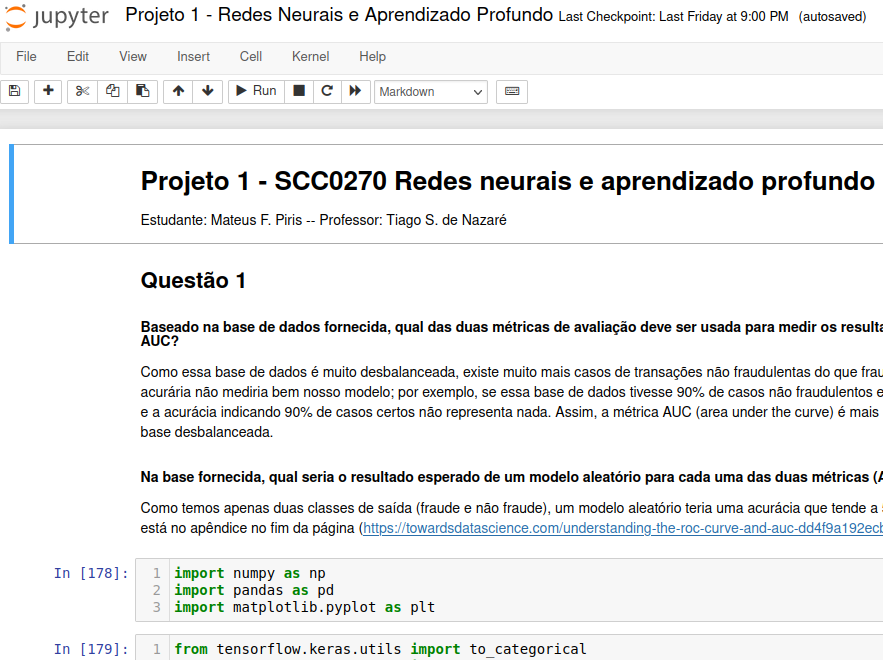